In [ ]:
# References:
# [1] https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a
# [2] https://stackoverflow.com/questions/54351852/accessing-shared-with-me-with-colab
# [3] https://stackoverflow.com/questions/53581278/test-if-notebook-is-running-on-google-colab

import os

try:
    from google.colab import drive
    from google.colab import files
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:

    # mount google drive 
    drive.mount('/content/MyDrive/', force_remount=True)

    #change directory
    try:
        os.chdir('/content/MyDrive')

    except:
        os.chdir('/content/MyDrive')

wdir = os.getcwd()

print(wdir)

Mounted at /content/MyDrive/
/content/MyDrive


In [ ]:
# root directory
wdir = os.getcwd()

wdir

'/content/MyDrive'

In [ ]:
os.chdir('/content/MyDrive/MyDrive')

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "/content/MyDrive/MyDrive"
CHAPTER_ID = "v1"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [ ]:
import gym 
from gym import Env
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 
import numpy as np
import random
import os
!pip install pygame==2.1.0
!pip install stable_baselines3
import pygame
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

import gym
from stable_baselines3.common.callbacks import StopTrainingOnNoModelImprovement, EvalCallback
from gym.wrappers import FlattenObservation
from gym.wrappers import TimeLimit
import stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.evaluation import evaluate_policy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
pygame 2.1.0 (SDL 2.0.16, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys

In [ ]:
import gym

In [ ]:
! pip install gym[atari,accept-rom-license]==0.21.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
env = gym.make("MsPacman-v0")#,render_mode='human')

In [ ]:
# before proceeding please install 'OpenAI Gym' 

import gym
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as anime

(210, 160, 3)
action_space : Discrete(9)


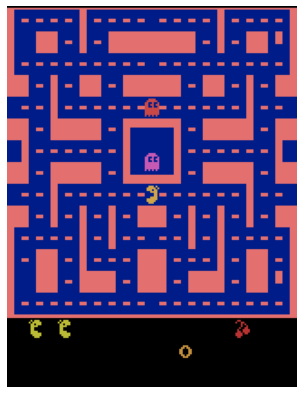

In [ ]:
# starting a new game and plotting the frame

obs = env.reset()
print(obs.shape) #[ht, wd, channels]

plt.figure(figsize=(7, 7))
plt.imshow(obs)
plt.axis('off')

# 9 possible actions in Pacman : 0,...,8
# 0: no change, 1: up, 2: right, 3: left, 4: down, ...
print('action_space :', env.action_space)

original obs shape : (210, 160, 3)
new obs shape : (84, 80, 3)
0 228 -128 100


(-0.5, 79.5, 83.5, -0.5)

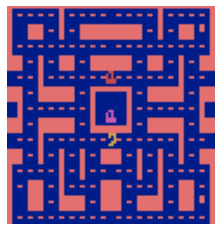

In [ ]:
# reducing the image size, crop for faster training

def preprocess(obs):
    img = obs[1:168:2, : : 2, :] # crop and downsize
    img = img - 128 # normalize between -128 and 127
    img = img.astype('int8') # saves memory
    return img

print('original obs shape :', obs.shape)
print('new obs shape :', preprocess(obs).shape)
print(obs.min(), obs.max(), preprocess(obs).min(), preprocess(obs).max())

plt.imshow((preprocess(obs) + 128).astype('uint8')) # plt doesn't plot 'int8'
plt.axis('off')

In [ ]:
# saving the previous game as a video

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return anime.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

In [ ]:
    action = env.action_space.sample()

    # perform this action on the environment
    #env.step(action)
    observation, reward, terminated, truncated = env.step(action)

In [ ]:
observation

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228, 111, 111],
        [228, 111, 111],
        [228, 111, 111],
        ...,
        [228, 111, 111],
        [228, 111, 111],
        [228, 111, 111]],

       [[228, 111, 111],
        [228, 111, 111],
        [228, 111, 111],
        ...,
        [228, 111, 111],
        [228, 111, 111],
        [228, 111, 111]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
reward

0.0

In [ ]:
terminated

False

In [ ]:
truncated

{'lives': 3, 'episode_frame_number': 2, 'frame_number': 2}

In [ ]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


game_score : 370
game_score : 190
game_score : 170
game_score : 200
game_score : 160
game_score : 190
game_score : 240
game_score : 160
game_score : 240
game_score : 300


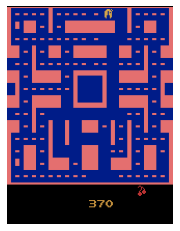

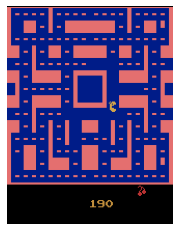

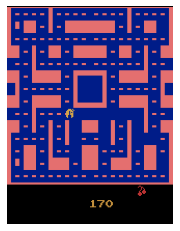

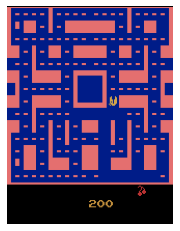

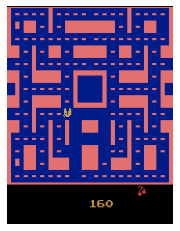

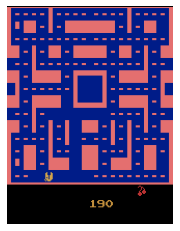

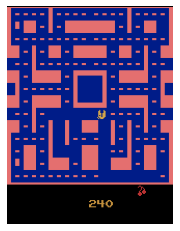

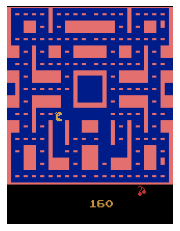

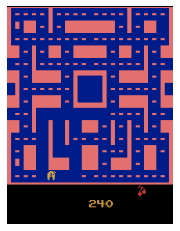

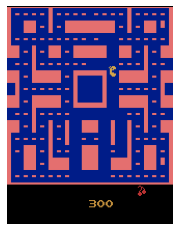

In [ ]:
import time

num_steps = 10000

# create a new instance of pacman, and get the initial state
for i in range(10):

  frames = [] # will store the game frames, can be converted to video
  game_reward = 0
  state = env.reset()

  for s in range(num_steps+1):
      #print(f"step: {s} out of {num_steps}")

      # sample a random action from the list of available actions
      action = env.action_space.sample()

      # perform this action on the environment
      #env.step(action)
      observation, reward, terminated, info = env.step(action)

      #print(1 + action, end=' ')
      frames.append(observation) # if you want to store the game as a vid
      game_reward += int(reward)
      #env.render()
      time.sleep(0.05) # to slowdown the game
      # check if game ended
      if terminated:
          break

  print('game_score :', game_reward)
      # print the new state
      #env.render()

  # end this instance of the pacman environment
  env.close()

  plot_animation(frames).save('/content/MyDrive/MyDrive/images/Randoms/PacMan_Random{i}.mp4'.format(i = i+1), fps=30, extra_args=['-vcodec', 'libx264'])

In [ ]:
"""# playing using the online q-net

import time

#sess = tf.InteractiveSession()
#saver.restore(sess, './datasets/Pacman/pacman.ckpt')

n_max_steps = 5000
frames = [] # will store the game frames, can be converted to video
game_reward = 0

# start a  new game
obs = env.reset()

# skip the start of each life as in pacman its just waiting
for skip in range(skip_start): 
    obs, reward, done, info = env.step(0)

lives_left = 3

for stp in range(n_max_steps):
    state = preprocess(obs)    
    # determine the action using online q_net
    q_vals_eval = q_vals_online.eval(feed_dict={X_state: state.reshape(1, input_height, input_width, n_channels)})[0]
    action = np.argmax(q_vals_eval)
    # execute the action
    obs, reward, done, info = env.step(1 + action)
    
    # skip the start of each life as in pacman its just waiting
    if lives_left != info['lives']:
        lives_left = info['lives']
        for skip in range(35): 
            obs, reward, done, info = env.step(0)
    
    print(1 + action, end=' ')
    frames.append(obs) # if you want to store the game as a vid
    game_reward += int(reward)
    #env.render()
    time.sleep(0.05) # to slowdown the game
    # check if game ended
    if done:
        break

print('game_score :', game_reward)
# 0:no change, 1:t, 2:r, 3:l, 4:d """

"# playing using the online q-net\n\nimport time\n\n#sess = tf.InteractiveSession()\n#saver.restore(sess, './datasets/Pacman/pacman.ckpt')\n\nn_max_steps = 5000\nframes = [] # will store the game frames, can be converted to video\ngame_reward = 0\n\n# start a  new game\nobs = env.reset()\n\n# skip the start of each life as in pacman its just waiting\nfor skip in range(skip_start): \n    obs, reward, done, info = env.step(0)\n\nlives_left = 3\n\nfor stp in range(n_max_steps):\n    state = preprocess(obs)    \n    # determine the action using online q_net\n    q_vals_eval = q_vals_online.eval(feed_dict={X_state: state.reshape(1, input_height, input_width, n_channels)})[0]\n    action = np.argmax(q_vals_eval)\n    # execute the action\n    obs, reward, done, info = env.step(1 + action)\n    \n    # skip the start of each life as in pacman its just waiting\n    if lives_left != info['lives']:\n        lives_left = info['lives']\n        for skip in range(35): \n            obs, reward, don